In [1]:
# Import libraries
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm

# Create a portfolio of equities
tickers = ['AMZN', 'TSLA', 'AAPL', 'GOOG']

# Set the weights (summing up to 1)
weights = np.array([0.25, 0.3, 0.15, 0.3])

# Set the initial investment
initial_investment = 1000000

# Read all the tickers at once
stocks = yf.Tickers(tickers)
hist_data = stocks.history(period='3y')['Close']
hist_data

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,TSLA
Date,,,,
2021-05-17,124.148102,163.519501,116.070503,192.276672
2021-05-18,122.751968,161.613998,115.171501,192.623337
2021-05-19,122.594681,161.589996,115.435501,187.820007
2021-05-20,125.170631,162.384003,117.804497,195.593338
2021-05-21,123.322227,160.154007,117.254997,193.626663
...,...,...,...,...
2024-05-09,184.320007,189.500000,171.580002,171.970001
2024-05-10,183.050003,187.479996,170.289993,168.470001
2024-05-13,186.279999,186.570007,170.899994,171.889999


In [2]:
# Delete rows (if any) with NaN
hist_data = hist_data.dropna()

In [3]:
# Compute daily return rates
return_rates = hist_data.pct_change()
return_rates = return_rates.dropna()
return_rates

,AAPL,AMZN,GOOG,TSLA
Date,,,,
2021-05-18,-0.011246,-0.011653,-0.007745,0.001803
2021-05-19,-0.001281,-0.000149,0.002292,-0.024936
2021-05-20,0.021012,0.004914,0.020522,0.041387
2021-05-21,-0.014767,-0.013733,-0.004665,-0.010055
2021-05-24,0.013314,0.013084,0.026255,0.044002
...,...,...,...,...
2024-05-09,0.010014,0.007979,0.002454,-0.015739
2024-05-10,-0.006890,-0.010660,-0.007518,-0.020352
2024-05-13,0.017645,-0.004854,0.003582,0.020300


In [4]:
# Generate the variance-covariance matrix
cov_matrix = return_rates.cov()
cov_matrix

,AAPL,AMZN,GOOG,TSLA
AAPL,0.000289,0.000234,0.000219,0.000315
AMZN,0.000234,0.000556,0.000310,0.000363
GOOG,0.000219,0.000310,0.000401,0.000274
TSLA,0.000315,0.000363,0.000274,0.001311


In [5]:
# Compute the mean of return rates
mean_return_rates = return_rates.mean()
mean_return_rates

AAPL    0.000709
AMZN    0.000442
GOOG    0.000736
TSLA    0.000529
dtype: float64

In [6]:
# Compute the mean of portfolio r.r.
mean_port = mean_return_rates.dot(weights)
mean_port

0.0005789251190398037

In [7]:
# Compute the standard deviation of portfolio r.r.
std_port = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
std_port

0.020297604184683873

In [8]:
# Compute the z-value
alpha = 0.99
z_value = norm.ppf(1 - alpha)
z_value

-2.3263478740408408

In [9]:
# Compute the (1-alpha)th quantile
quantile = mean_port + std_port * z_value
quantile

-0.046640363224121996

In [10]:
# Alternatively, we can compute the quantile directly
norm.ppf(1-alpha, mean_port, std_port)

-0.046640363224121996

In [11]:
# Compute the (absolute) VaR of the portfolio
VaR_port = - initial_investment * quantile
print('The VaR of the portfolio is:', VaR_port)

The VaR of the portfolio is: 46640.363224122


In [12]:
# Compute the VaR enlarging the time horizon
VaR_days = []
horizons = range(1, 31)

for k in horizons:
    VaR_k = np.sqrt(k) * VaR_port
    VaR_days.append(VaR_k)
    
VaR_days

[46640.363224122,
 65959.43422556066,
 80783.47878764627,
 93280.726448244,
 104291.02266441805,
 114245.09131716858,
 123398.8021487495,
 131918.86845112132,
 139921.08967236598,
 147489.77868577983,
 154688.5849003033,
 161566.95757529253,
 168164.2211108368,
 174512.25957935574,
 180637.35002808936,
 186561.452896488,
 192303.14399022845,
 197878.30267668198,
 203300.62998397867,
 208582.0453288361,
 213732.99491477365,
 218762.69471031093,
 223679.32420899952,
 228490.18263433716,
 233201.81612061,
 237820.12220085334,
 242350.4363629388,
 246797.604297499,
 251166.04262651212,
 255459.79028085995]

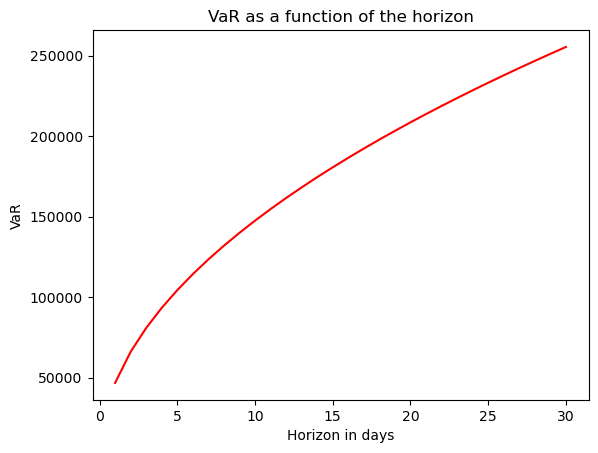

In [13]:
# Plot VaR as a function of the horizon
import matplotlib.pyplot as plt

plt.xlabel('Horizon in days')
plt.ylabel('VaR')
plt.title('VaR as a function of the horizon')
plt.plot(horizons, VaR_days, color='red')
# Save an image in png format
plt.savefig('VaR.png', dpi=300)

In [14]:
# Download in a period
tickers = ['AMZN', 'TSLA', 'AAPL', 'GOOG']
hist_data = yf.download(tickers,
                       start='2024-05-01',
                       end='2024-05-08')['Close']
hist_data

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,TSLA
Date,,,,
2024-05-01,169.300003,179.000000,165.570007,179.990005
2024-05-02,173.029999,184.720001,168.460007,180.009995
2024-05-03,183.380005,186.210007,168.990005,181.190002
2024-05-06,181.710007,188.699997,169.830002,184.759995
2024-05-07,182.399994,188.759995,172.979996,177.809998
